   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2               

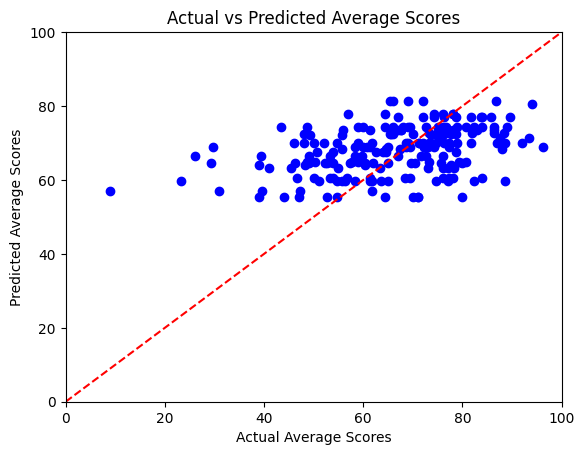

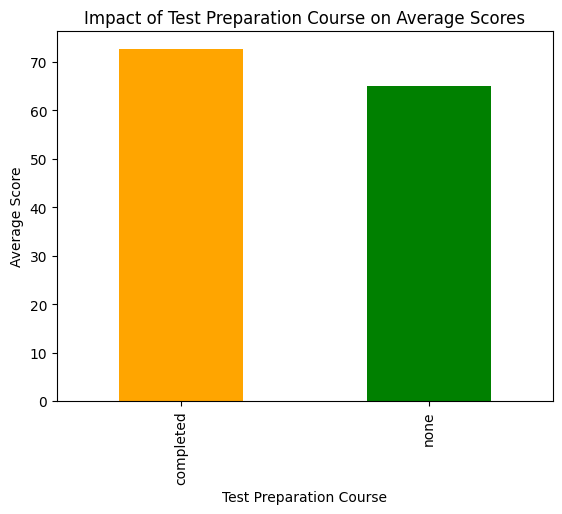

In [17]:
# Student Performance Analyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
data = pd.read_csv('StudentsPerformance.csv')
df = pd.DataFrame(data)

# Display basic information about the dataset
# print(df.info())
# print(df.describe())
print(df.head(10))

X = df[['parental level of education', 'lunch', 'test preparation course']]
y = df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
y = df['Average Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


# Visualize the results
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Average Scores')
plt.ylabel('Predicted Average Scores')
plt.title('Actual vs Predicted Average Scores')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

# # Analyze the impact of test preparation course on average scores
prep_course = df.groupby('test preparation course')['Average Score'].mean()
prep_course.plot(kind='bar', color=['orange', 'green'])
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.title('Impact of Test Preparation Course on Average Scores')
plt.show()
